<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml10_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree(의사결정 나무)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋

wine 데이터셋 red/white 와인 분류

In [2]:
file_path = 'https://bit.ly/wine_csv_data'  # csv 파일이 저장된 GitHub 경로

In [3]:
wine_df = pd.read_csv(file_path)

In [4]:
wine_df.head(n=6)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
5,9.4,1.8,3.51,0.0


In [5]:
wine_df.tail(n=6)

,alcohol,sugar,pH,class
6491,9.7,1.3,3.29,1.0
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0
6496,11.8,0.8,3.26,1.0


In [6]:
# 연속형 자료(숫자 타입) 변수들의 기술 통계량
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
# 카테고리 타입 변수 빈도수(0 - red wine, 1 - white wine)
wine_df['class'].value_counts().sort_index()

,count
class,
0.0,1599
1.0,4898


class 빈도수 막대 그래프

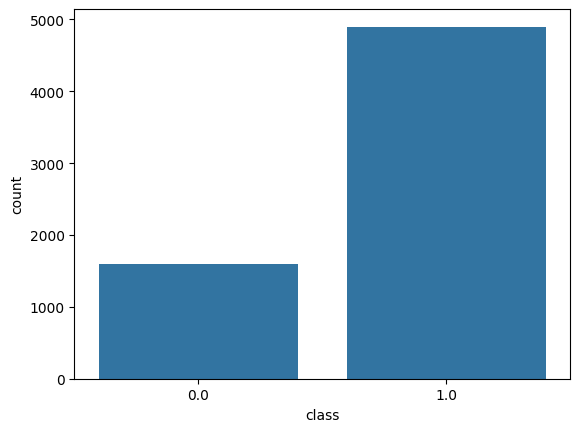

In [11]:
sns.countplot(data=wine_df, x='class')
plt.show()

alcohol, sugar, pH 변수들의 히스토그램

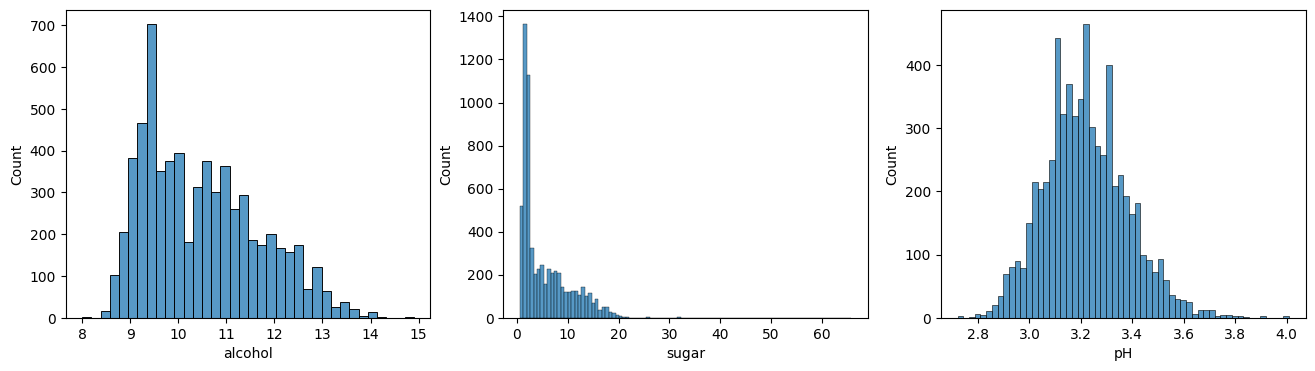

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, var in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=var, ax=axes[i])

plt.show()

alcohol, sugar, pH 변수들의 pairplot (class별로 색깔을 다르게)

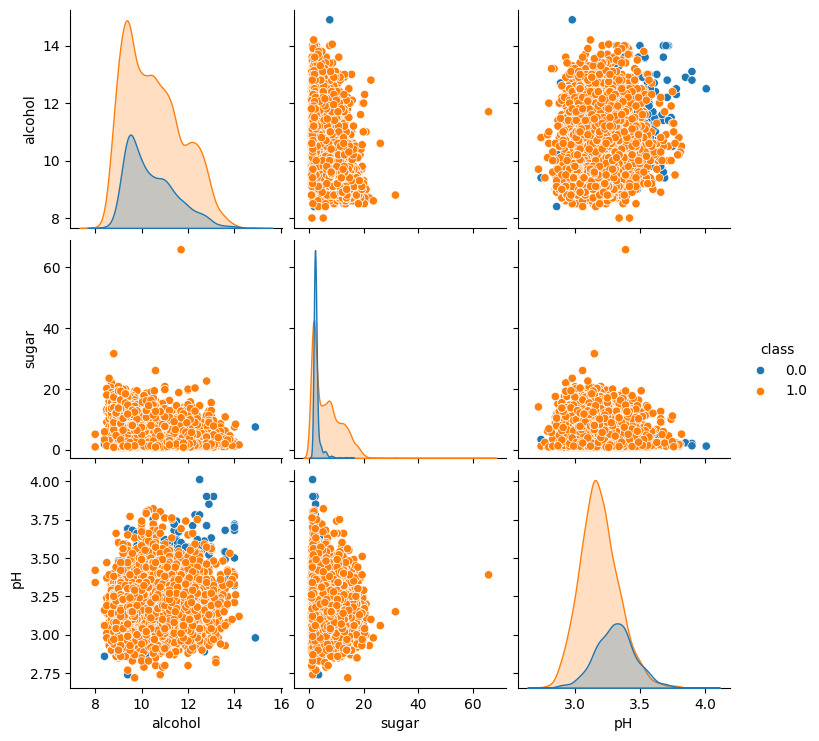

In [16]:
sns.pairplot(data=wine_df, hue='class')
plt.show()

In [17]:
feature_names = wine_df.columns[:3]
target_names = ['red', 'white']
print(feature_names)
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


# 훈련 셋, 테스트 셋 나누기

In [18]:
x = wine_df[wine_df.columns[:3]].values  # 특성 배열(2d array)
y = wine_df['class'].values  # 타겟 배열(1d array)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [22]:
x_train.shape

(5197, 3)

In [23]:
x_test.shape

(1300, 3)

# Decision Tree Classifier

In [24]:
tree_clf = DecisionTreeClassifier(random_state=42)  # 모델 생성

In [25]:
tree_clf.fit(X=x_train, y=y_train)  # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [26]:
train_pred = tree_clf.predict(X=x_train)  # 훈련 셋 예측값
train_pred[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [27]:
y_train[:10]

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [28]:
cm_train = confusion_matrix(y_true=y_train, y_pred=train_pred)
cm_train

array([[1276,    3],
       [   8, 3910]])

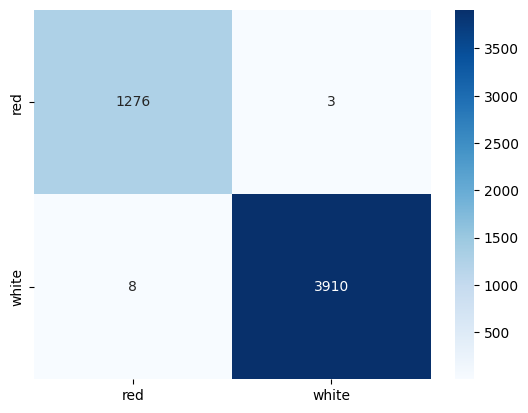

In [29]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [30]:
print(classification_report(y_true=y_train, y_pred=train_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

         red       0.99      1.00      1.00      1279
       white       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [31]:
test_pred = tree_clf.predict(X=x_test)  # 테스트 셋 예측값
test_pred[:10]

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [32]:
y_test[:10]

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [33]:
cm_test = confusion_matrix(y_true=y_test, y_pred=test_pred)
cm_test

array([[226,  94],
       [ 81, 899]])

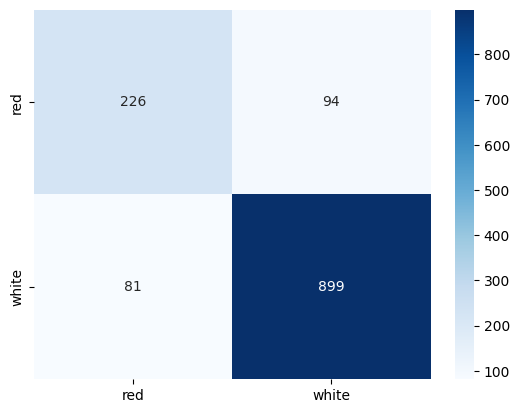

In [34]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [36]:
print(classification_report(y_true=y_test, y_pred=test_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

         red       0.74      0.71      0.72       320
       white       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



Decision Tree 분류 알고리즘은 과대적합(over-fitting)이 너무 크다!

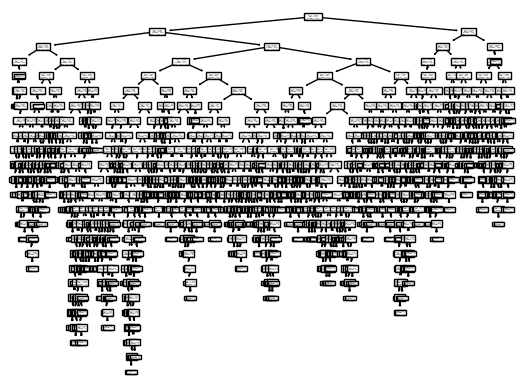

In [38]:
plot_tree(tree_clf)
plt.show()

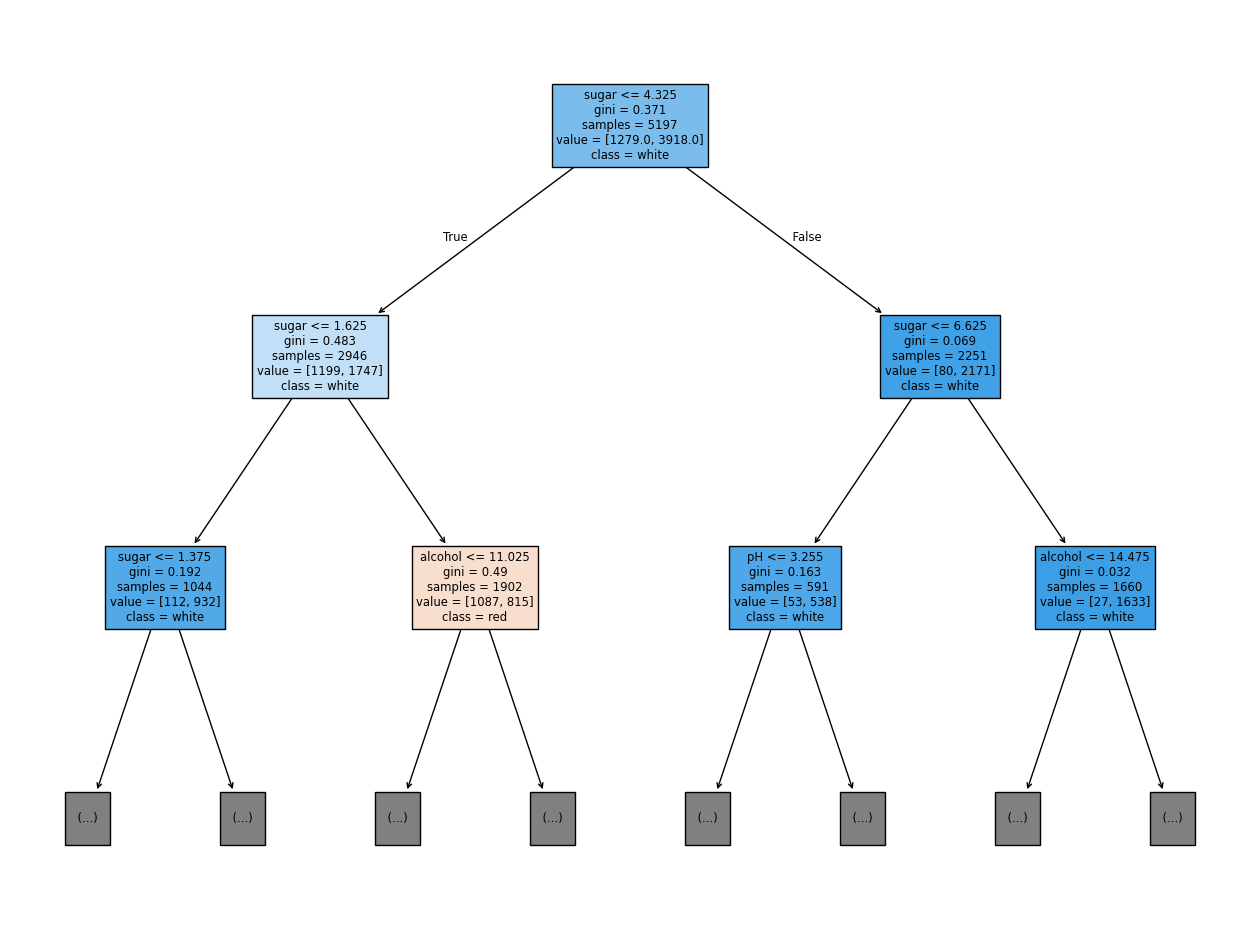

In [40]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2,
          feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

Decision Tree를 나누는 기준

---

**Gini impurity(Gini 불순도)**

$$
Gini = 1 - \sum_i p_i^2
$$

*   $ p_i $: i번째 클래스가 될 확률
*   이진(binary-class) 분류
    *   $ Gini = 1 - (p_0^2 + p_1^2) $
    *   양성(positive) 또는 음성(negative)으로 완벽하게 분류가 된 경우, $ Gini = 1 - 1 = 0 $.
        *   Gini 불순도 최소.
    *   양성과 음성이 똑같은 비율로 섞여 있는 경우, $ Gini = 1 - (0.5^2 + 0.5^2) = 0.5 $.
        *   Gini 불순도 최대.
    *   양성과 음성의 비율이 6:4인 경우, $ Gini = 1 - (0.6^2 + 0.4^2) = 0.48 $